In [5]:
# Import librairies
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from timeit import default_timer as timers



<ipython-input-5-822850982b33>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
ls "/content/drive/My Drive"


 202004.csv                         monthly-sunspots.csv    'Task 1.gsheet'
'AI in Industry .gdoc'              output.csv               test_FD001.txt
'Blackcoffer Internship'/          'PR 4101.gdoc'           'To-do list.gsheet'
'Colab Notebooks'/                  reviewslinkedin.csv      train_FD001.txt
 data/                              RUL_FD001.txt           'Untitled document.gdoc'
'KUCHIPUDI SONGS '/                'RUL Prediction .ipynb'   YOLO/
'Maven Healthcare Challenge.gdoc'  "Samvidha's Resume.pdf"
'Monthly budget.gsheet'             Sunspots.csv


In [27]:
df= pd.read_csv("/content/drive/MyDrive/sunspot_data.csv")
df.head(10)

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1
5,5,1818,1,6,1818.015,-1,-1.0,0,1
6,6,1818,1,7,1818.018,-1,-1.0,0,1
7,7,1818,1,8,1818.021,65,10.2,1,1
8,8,1818,1,9,1818.023,-1,-1.0,0,1
9,9,1818,1,10,1818.026,-1,-1.0,0,1


In [28]:
df.describe()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,36858.500000,1918.416750,6.518896,15.729347,1918.916406,79.248732,6.924587,4.429678,0.998331
std,21280.697909,58.264401,3.447114,8.800032,58.264520,77.470942,4.778793,7.884112,0.040814
min,0.000000,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,18429.250000,1868.000000,4.000000,8.000000,1868.458500,15.000000,3.000000,1.000000,1.000000
50%,36858.500000,1918.000000,7.000000,16.000000,1918.917500,58.000000,6.600000,1.000000,1.000000
75%,55287.750000,1969.000000,10.000000,23.000000,1969.373250,125.000000,10.000000,1.000000,1.000000
max,73717.000000,2019.000000,12.000000,31.000000,2019.832000,528.000000,77.700000,60.000000,1.000000


In [29]:
del(df['Unnamed: 0'])
df.columns = ['year', 'month', 'day', 'fraction','sunspots', 'sdt', 'obs','indicator']
df.head(-5)

# Add the column time
df['time']=df[['year', 'month', 'day']].apply(lambda s: pd.datetime(*s),axis = 1)
# time column is the index of the dataframe
df.index = df['time']
# replace the Nan by linear interpolation
df['sunspots'].interpolate(method='linear', inplace=True)

<ipython-input-29-adf454332899>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['time']=df[['year', 'month', 'day']].apply(lambda s: pd.datetime(*s),axis = 1)


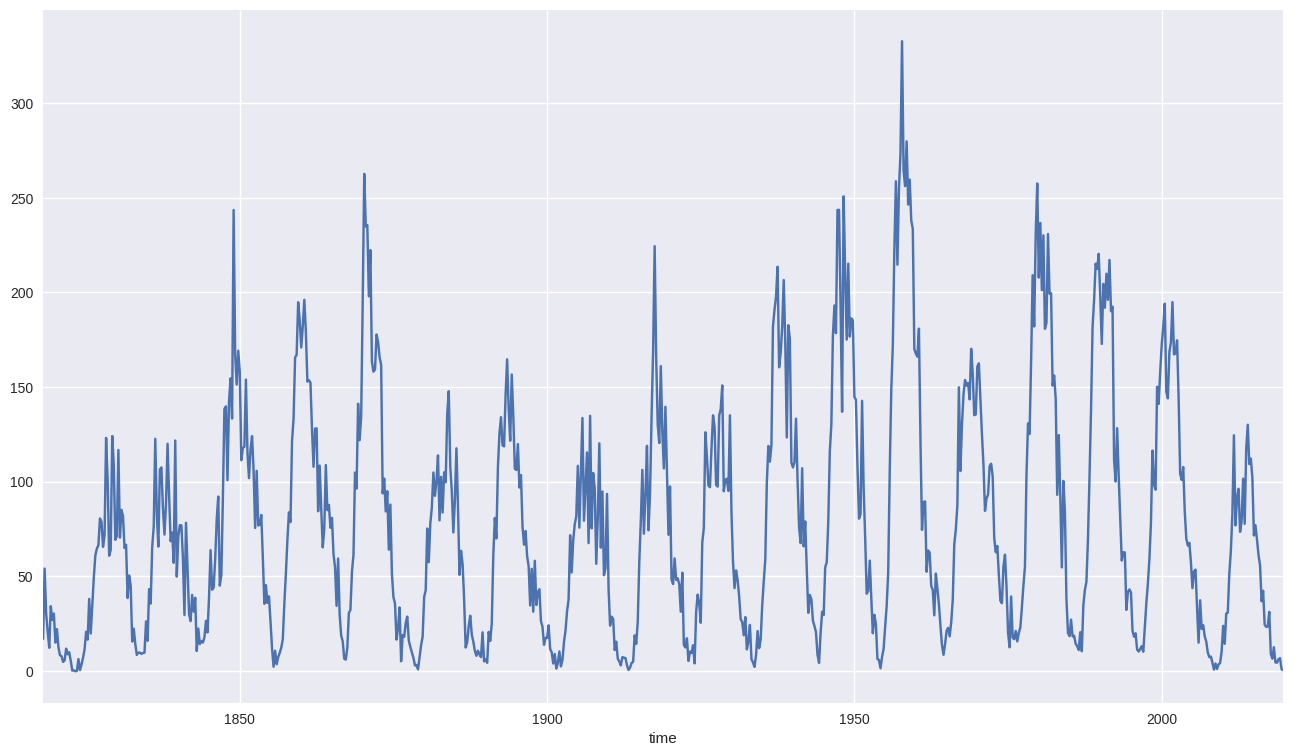

In [30]:
ts = pd.Series(data=df.sunspots, index=df.index)
#ts = ts['1900-01-01':]
ts_month = ts.resample('MS').mean()
ts_quarter = ts.resample('Q').mean()
ts_quarter.plot()
plt.show()

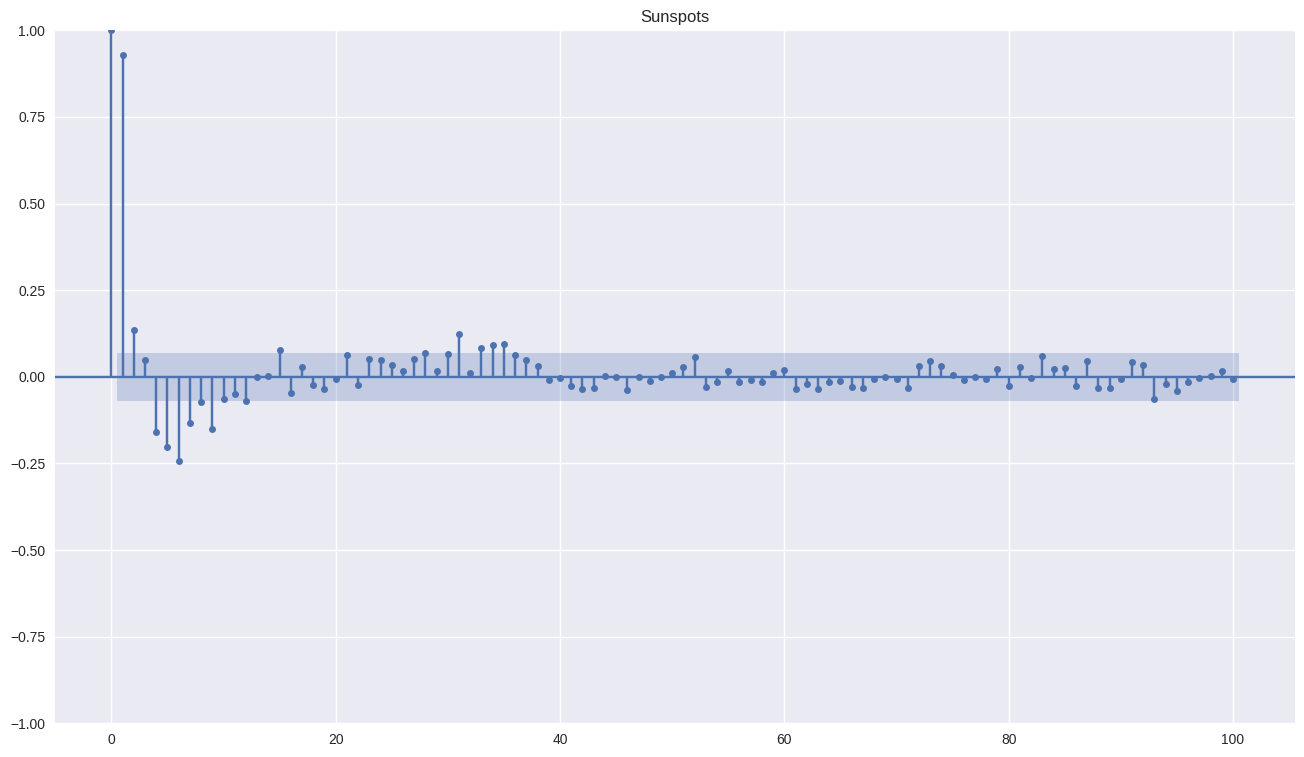

In [31]:
plot_pacf(ts_quarter,lags=100,title='Sunspots')
plt.show()


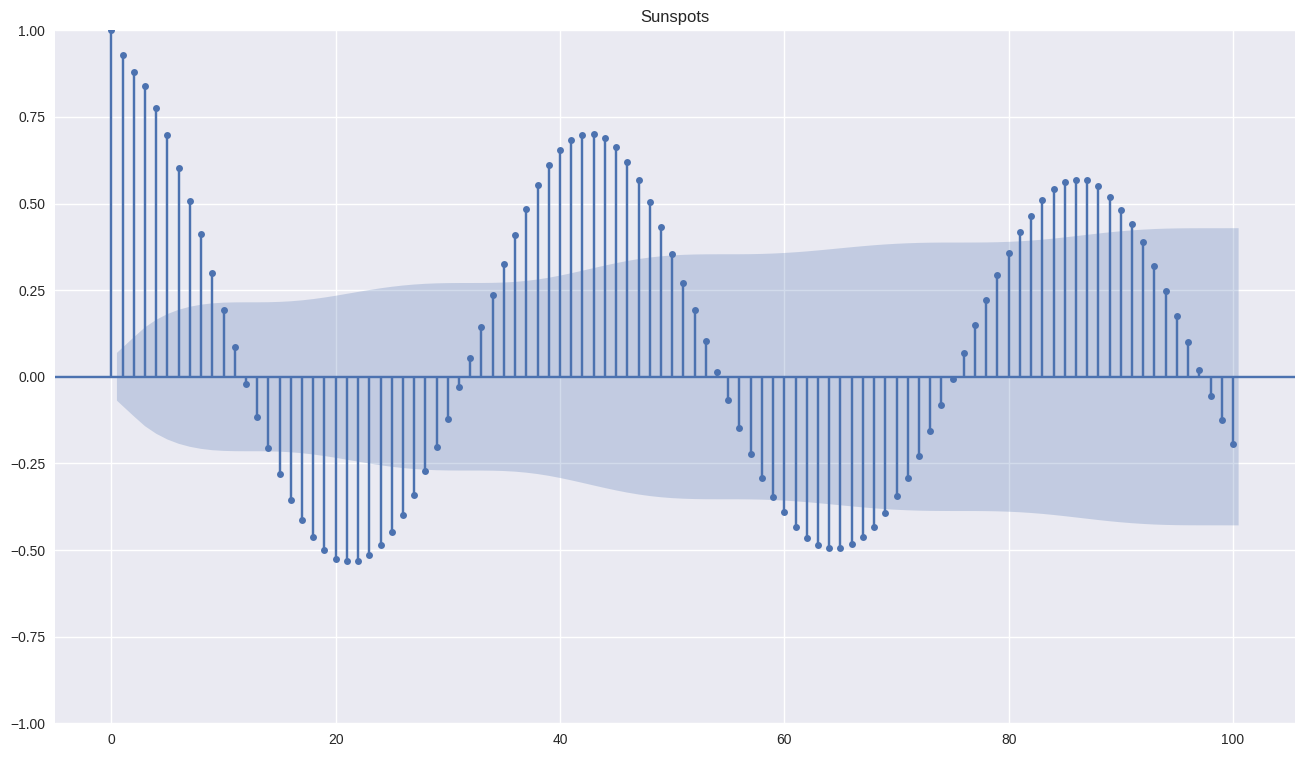

In [32]:
plot_acf(ts_quarter,lags=100,title='Sunspots')
plt.show()

In [33]:

from statsmodels.tsa.stattools import adfuller
def printADFTest(serie):
    result = adfuller(serie, autolag='AIC')
    print("ADF Statistic %F" % (result[0]))
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print('\n')

#d = 0
printADFTest(ts_quarter)
#d = 1
#printADFTest(ts_quarter.diff(1).dropna())

ADF Statistic -9.816043
p-value: 5.494368220697694e-17
Critial Values:
   1%, -3.4385918508847646
Critial Values:
   5%, -2.865177791819505
Critial Values:
   10%, -2.568707096601096




In [34]:
model = sm.tsa.statespace.SARIMAX(ts_quarter, trend='n', order=(3,0,10), seasonal_order=(1,1,0,43))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                             sunspots   No. Observations:                  808
Model:             SARIMAX(3, 0, 10)x(1, 1, [], 43)   Log Likelihood               -3570.579
Date:                              Sun, 15 Oct 2023   AIC                           7171.158
Time:                                      17:09:42   BIC                           7240.756
Sample:                                  03-31-1818   HQIC                          7197.950
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7668      0.174      4.400      0.000       0.425       1.108
ar.L2          0.88

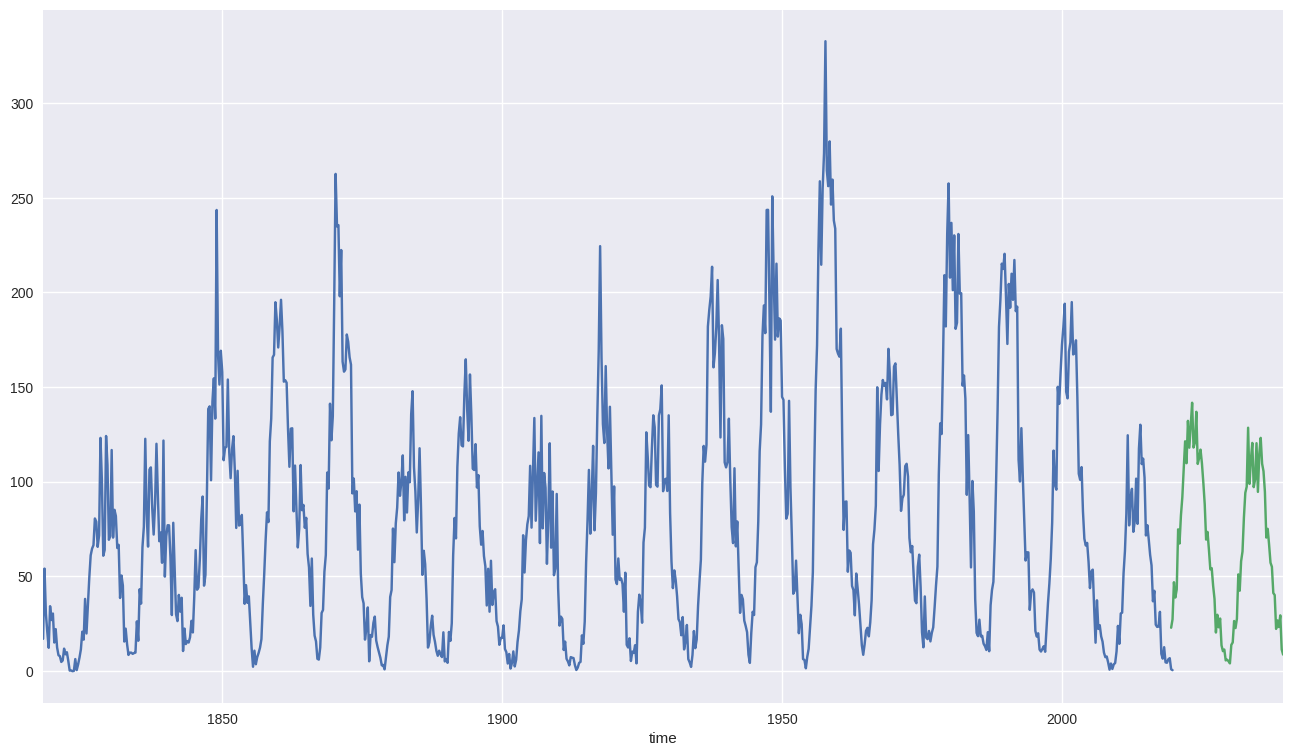

In [35]:
forecast = results.predict(start = ts_quarter.index[-2], end= ts_quarter.index[-2] + pd.DateOffset(months=240), dynamic= True)
ts_quarter.plot()
forecast.plot()
plt.show()